Importing Dataset

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

DataToClean = pd.read_csv('N:\AI_ML_RL\APT_dataset\dataset_\datacleaning\cleanedDataAndNormalize.csv')
print(DataToClean.shape)

(77963, 81)


In [39]:
for col in DataToClean.columns:
    missing = DataToClean[col].sum()

print(missing)

6.366462912410498e-12


Analyzing the number of features to use with PCA

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

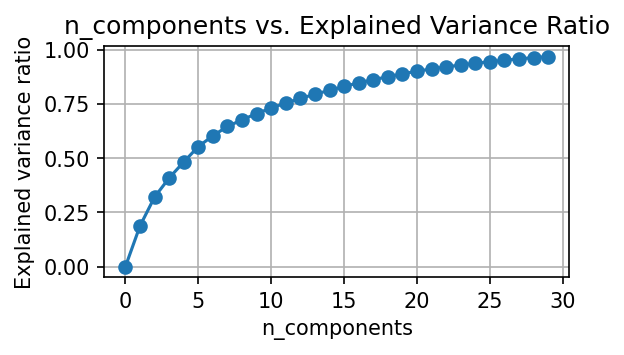

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

## Creating a list of [0..30]
nums = np.arange(30)

## Creating PCA model and scale the data
scaler = StandardScaler()
DataFrameCleaned_standardized = scaler.fit_transform(DataToClean)

## Evaluation the number of components to use
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(DataFrameCleaned_standardized)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

Scaling Data and Applying PCA with 30 components

In [29]:

type_of_attack = DataToClean[['Activity']]
targets = DataToClean[['Stage']]

columns = DataToClean.select_dtypes(include='number')
scaler = StandardScaler()
scaler.fit(columns)
DataToClean[columns.columns] = scaler.transform(columns)
pca = PCA(n_components=30)
newDataFrameCleaned = pca.fit_transform(DataToClean)
#newDataFrameCleaned['Activity']=type_of_attack
#newDataFrameCleaned['Stage']=targets
#print("Quantity of information in the dataset with 30 components: ",sum(newDataFrameCleaned.explained_variance_ratio_))


In [40]:
columns = ['principal component'+str(i) for i in range(newDataFrameCleaned.shape[1])]
PcaDF = pd.DataFrame(data = newDataFrameCleaned, columns = columns)
PcaDF['Activity']=type_of_attack

PcaDF['Stage']=targets

PcaDF.to_csv('N:\AI_ML_RL\APT_dataset\dataset_\datacleaning\cleanedPCA.csv',index=0)

